In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
import sklearn
from sklearn import preprocessing
import mysql.connector
from mysql.connector import Error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import tensorflow as tf
%matplotlib inline
sns.set()

In [2]:
connection = mysql.connector.connect(host='localhost',
                                         database='365_database',
                                         user='root',
                                         password='QWSSD:as')
try:
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.0.30
You're connected to database:  ('365_database',)


In [3]:
table_query = '''SHOW FULL TABLES;'''
table_name = pd.read_sql(table_query, connection)

names= table_name['Tables_in_365_database'].str.split("_",1, expand= True)[1].tolist()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
def sql_to_df(sql_query):
    connection= mysql.connector.connect(host='localhost',
                                         database='365_database',
                                         user='root',
                                         password='ahmed@178')
    df= pd.read_sql(sql_query, connection)
    return df

def dataframes():
    d= globals()
    for i in range(0,len(names)):
        sql_query= '''SELECT * FROM 365_{};'''.format(names[i])
        globals()["{}".format(names[i])]= sql_to_df(sql_query)
    for i in range(0, len(names)):
        globals()["{}".format(names[i])]= d['{}'.format(names[i])]
    return 'Done';

dataframes()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqli

'Done'

In [5]:
student_engagement_records= student_engagement[['student_id','date_engaged']]

student_engagement_records.insert(loc=1, column='engaged', value= 1)

student_info_records= student_info[['student_id','date_registered']]

student_purchases['purchase_type']=student_purchases['purchase_type'].map({'Monthly':1,'Quarterly':2,'Annual':3})

student_purchases_records= student_purchases[['student_id','purchase_type','date_purchased']]


student_engagement_with_registration= student_info_records.merge(student_engagement_records,
                                                                 left_on='student_id',
                                                                 right_on='student_id' ,how='left')
student_engagement_with_registration.dropna(inplace=True)
#student_engagement_with_registration.drop(['student_id'],axis=1, inplace=True)
student_engagement_with_registration= student_engagement_with_registration.reset_index()
student_engagement_with_registration.drop(['index'], axis=1, inplace=True)

raw_data_nonprocessed= student_engagement_with_registration.merge(student_purchases_records, left_on='student_id', 
                                                                     right_on= 'student_id', how='left')
#raw_data_nonprocessed.drop(['student_id'],axis=1, inplace=True)
raw_data_nonprocessed.reset_index(inplace=True)
raw_data_nonprocessed.drop(['index'], axis=1, inplace=True)
raw_data_nonprocessed.fillna(0, inplace=True)

In [6]:
raw_data_nonprocessed

,student_id,date_registered,engaged,date_engaged,purchase_type,date_purchased
0,258798,2022-01-01,1.0,2022-01-01,0.0,0
1,258800,2022-01-01,1.0,2022-01-03,3.0,2022-01-01
2,258800,2022-01-01,1.0,2022-01-04,3.0,2022-01-01
3,258800,2022-01-01,1.0,2022-01-05,3.0,2022-01-01
4,258800,2022-01-01,1.0,2022-01-06,3.0,2022-01-01
...,...,...,...,...,...,...
88751,295509,2022-10-20,1.0,2022-10-20,0.0,0
88752,295510,2022-10-20,1.0,2022-10-20,0.0,0
88753,295511,2022-10-20,1.0,2022-10-20,0.0,0
88754,295512,2022-10-20,1.0,2022-10-20,0.0,0


In [7]:
student_learning_with_course_ratings= student_learning.merge(course_ratings, how='left').dropna()
course_rating= student_learning_with_course_ratings.groupby('course_id').agg(summin=('minutes_watched','sum'), av_rating=('course_rating','mean'))
course_rating_final= course_info.merge(course_rating, how='outer', left_on='course_id', right_on='course_id')

""" findingout the most countries registered"""
list_of_top10_countries= student_info['student_country'].value_counts().sort_values()[::-1][:10]

""" findout the most_paid countries"""
student_purchases_country= student_info.merge(student_purchases, how='outer')
student_purchases_country.drop('purchase_type', inplace=True, axis=1)
student_purchases_country.dropna(inplace=True)
list_of_top10_paid_countries= student_purchases_country['student_country'].value_counts().sort_values()[::-1][:10]

In [8]:
course_rating_final.head(2)

,course_id,course_title,summin,av_rating
0,2,Introduction to Tableau,7521.4,4.622378
1,3,The Complete Data Visualization Course with Py...,18398.6,4.705128


In [9]:
raw_data_nonprocessed= raw_data_nonprocessed.merge(student_info, how='left')
raw_data_nonprocessed

,student_id,date_registered,engaged,date_engaged,purchase_type,date_purchased,student_country
0,258798,2022-01-01,1.0,2022-01-01,0.0,0,IN
1,258800,2022-01-01,1.0,2022-01-03,3.0,2022-01-01,CA
2,258800,2022-01-01,1.0,2022-01-04,3.0,2022-01-01,CA
3,258800,2022-01-01,1.0,2022-01-05,3.0,2022-01-01,CA
4,258800,2022-01-01,1.0,2022-01-06,3.0,2022-01-01,CA
...,...,...,...,...,...,...,...
88751,295509,2022-10-20,1.0,2022-10-20,0.0,0,EG
88752,295510,2022-10-20,1.0,2022-10-20,0.0,0,IN
88753,295511,2022-10-20,1.0,2022-10-20,0.0,0,CM
88754,295512,2022-10-20,1.0,2022-10-20,0.0,0,CA


In [10]:
country_with_lat_long= pd.read_csv(r'G:/02 Programming/365_Learning_challenge/world_country_and_usa_states_latitude_and_longitude_values.csv')

student_info_full= student_info.merge(country_with_lat_long[['country_code','country','latitude','longitude']], left_on='student_country', right_on='country_code', how='left')
student_info_full.head(2)

,student_id,student_country,date_registered,country_code,country,latitude,longitude
0,258798,IN,2022-01-01,IN,India,20.593684,78.962880
1,258799,CO,2022-01-01,CO,Colombia,4.570868,-74.297333


In [11]:
import datetime

winter_sale_start=datetime.date(2022,1,17)
winter_sale_end=datetime.date(2022,1,28)
spring_offer_start= datetime.date(2022,3,21)
spring_offer_end= datetime.date(2022,3,31)
summer_campaign_start= datetime.date(2022,5,20)
summer_campaign_end= datetime.date(2022,6,1)
most_wanted_campaign_start= datetime.date(2022,7,18)
most_wanted_campaign_end=datetime.date(2022,7,29)
platformgamification= datetime.date(2022,9,16)
hero_campaign_start= datetime.date(2022,9,19)
hero_campaign_end= datetime.date(2022,9,30)

delta = datetime.timedelta(days=1)

def datemap(start_date,end_date,time_delta,value):
    map1=[]
    map2=[]
    while (start_date <= end_date):
        map1.append(start_date)
        map2.append(value)
        start_date += time_delta
    df= pd.DataFrame({'Date':map1, 'Offer':map2})
    return df
    
winter_sale= datemap(winter_sale_start, winter_sale_end, delta,1)
spring_offer= datemap(spring_offer_start, spring_offer_end, delta,2)
summer_campaign= datemap(summer_campaign_start, summer_campaign_end, delta,3)
most_wanted_campaign= datemap(most_wanted_campaign_start, most_wanted_campaign_end, delta,4)
platform_game= datemap(platformgamification, platformgamification, delta,5)
hero_campaign= datemap(hero_campaign_start, hero_campaign_end, delta,6)
all_offers_list=[winter_sale, spring_offer, summer_campaign, most_wanted_campaign, platform_game,hero_campaign]
all_offers= pd.concat(all_offers_list)

In [12]:
raw_data_nonprocessed= raw_data_nonprocessed.merge(all_offers,left_on='date_purchased', right_on='Date', how='left').fillna(0)
raw_data_nonprocessed['Offer'].unique().tolist()

[0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 5.0]

In [13]:
raw_data_2= raw_data_nonprocessed.rename(columns= {'purchase_type':'targets'})

In [14]:
raw_data_2.head(2)

,student_id,date_registered,engaged,date_engaged,targets,date_purchased,student_country,Date,Offer
0,258798,2022-01-01,1.0,2022-01-01,0.0,0,IN,0,0.0
1,258800,2022-01-01,1.0,2022-01-03,3.0,2022-01-01,CA,0,0.0


In [15]:
raw_data_3= raw_data_2.merge(student_info_full[['student_id','country_code','country','latitude','longitude']], on='student_id', how='left')
raw_data_3.head(2)
data_with_targets= raw_data_3.drop(['student_country','date_registered','date_engaged','engaged','date_purchased','Date','country_code','country'], axis=1).dropna()

In [16]:
data_with_targets

,student_id,targets,Offer,latitude,longitude
0,258798,0.0,0.0,20.593684,78.962880
1,258800,3.0,0.0,56.130366,-106.346771
2,258800,3.0,0.0,56.130366,-106.346771
3,258800,3.0,0.0,56.130366,-106.346771
4,258800,3.0,0.0,56.130366,-106.346771
...,...,...,...,...,...
88751,295509,0.0,0.0,26.820553,30.802498
88752,295510,0.0,0.0,20.593684,78.962880
88753,295511,0.0,0.0,7.369722,12.354722
88754,295512,0.0,0.0,56.130366,-106.346771


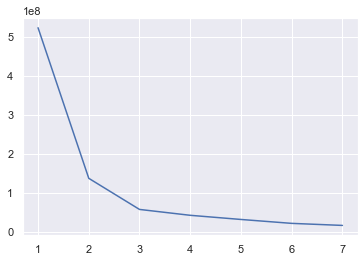

In [17]:
from sklearn.cluster import KMeans
x= data_with_targets.iloc[:,2:] #2 arguments : for all rows, and for the columns removes the last one


wcss=[]
for i in range(1,8):
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter= kmeans.inertia_
    wcss.append(wcss_iter)
    
no_clusters= range(1,8)
plt.plot(no_clusters, wcss)

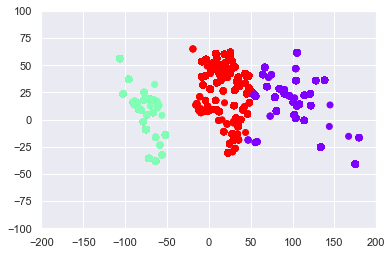

In [18]:
kmeans= KMeans(3)
kmeans.fit(x)
identified_clusters= kmeans.fit_predict(x)
data_with_targets['Cluster']= identified_clusters
plt.scatter(data_with_targets['longitude'],data_with_targets['latitude'],c=data_with_targets['Cluster'],cmap='rainbow')
plt.xlim(-200,200)
plt.ylim(-100,100)
plt.show()

In [19]:
final_data= data_with_targets.drop(['latitude','longitude'], axis=1)
final_data

,student_id,targets,Offer,Cluster
0,258798,0.0,0.0,0
1,258800,3.0,0.0,1
2,258800,3.0,0.0,1
3,258800,3.0,0.0,1
4,258800,3.0,0.0,1
...,...,...,...,...
88751,295509,0.0,0.0,2
88752,295510,0.0,0.0,0
88753,295511,0.0,0.0,2
88754,295512,0.0,0.0,1


In [20]:
student_learning.head()

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07


In [21]:
student_learning_final= student_learning.pivot_table(index=['student_id'],aggfunc='sum').reset_index()

In [22]:
student_learning_final

,student_id,course_id,minutes_watched
0,258798,23,0.3
1,258800,555,531.2
2,258803,293,620.0
3,258804,14,14.2
4,258807,7,1.8
...,...,...,...
18162,295509,23,0.8
18163,295510,53,0.1
18164,295511,7,7.8
18165,295512,7,10.4


In [23]:
student_quizzes_final= student_quizzes.merge(quiz_info,on='quiz_id',how='left')
student_quizzes_final.dropna(inplace=True)

def quiz(df):
    if df['answer_id_x']== df['answer_id_y']:
        return 1
    else:
        return 0

def exam(df):
    if df['exam_result'] >=60:
        return 1
    else:
        return 0
student_exams['Passed']= student_exams.apply(exam, axis=1)
student_exams_cleaned= student_exams[['student_id','Passed']].pivot_table(index=['student_id'],aggfunc='mean').reset_index()

student_quizzes_final['Answer']= student_quizzes_final.apply(quiz, axis=1)

student_quizzes_cleaned= student_quizzes_final[['student_id','Answer']].pivot_table(index=['student_id'],aggfunc='mean').reset_index()

In [24]:
final_data

,student_id,targets,Offer,Cluster
0,258798,0.0,0.0,0
1,258800,3.0,0.0,1
2,258800,3.0,0.0,1
3,258800,3.0,0.0,1
4,258800,3.0,0.0,1
...,...,...,...,...
88751,295509,0.0,0.0,2
88752,295510,0.0,0.0,0
88753,295511,0.0,0.0,2
88754,295512,0.0,0.0,1


In [25]:
final_data_w_learning= final_data.merge(student_learning_final[['student_id','minutes_watched']] , how='left')

In [26]:
final_data_w_learning.dropna(inplace=True)

In [27]:
final_data_2= final_data_w_learning

In [28]:
final_data_3= final_data_2.merge(student_quizzes_cleaned[['student_id','Answer']],how='left').fillna(0)

In [29]:
final_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88514 entries, 0 to 88513
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       88514 non-null  int64  
 1   targets          88514 non-null  float64
 2   Offer            88514 non-null  float64
 3   Cluster          88514 non-null  int32  
 4   minutes_watched  88514 non-null  float64
 5   Answer           88514 non-null  float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 4.4 MB


In [30]:
final_raw_data= final_data_3.merge(student_exams_cleaned, how='left').fillna(0)

In [31]:
final_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88514 entries, 0 to 88513
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       88514 non-null  int64  
 1   targets          88514 non-null  float64
 2   Offer            88514 non-null  float64
 3   Cluster          88514 non-null  int32  
 4   minutes_watched  88514 non-null  float64
 5   Answer           88514 non-null  float64
 6   Passed           88514 non-null  float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 5.1 MB


In [41]:
satisfied= np.where(((final_raw_data['minutes_watched'] >= 60)),1,0) # anyone who watches more than 60 minutes is considered satisified # anyone paid client is considered loyal
final_raw_data['satisfied']= satisfied
final_data_3= final_raw_data
final_data_3
targets= np.where(final_data_3['targets']!=0,1,0)
final_data_3['Y']=targets

In [42]:
X= final_data_3[['Offer','Answer','satisfied','Passed','Cluster']]

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features']= X.columns
vif

,VIF,Features
0,1.270067,Offer
1,2.664053,Answer
2,7.445134,satisfied
3,5.806304,Passed
4,2.341900,Cluster


In [44]:
targets= final_data_3['Y']
X.head()
scaler= StandardScaler()
scaler.fit(X)
inputs_scaled= scaler.transform(X)
inputs_scaled.shape

(88514, 5)

In [45]:
x_train, x_test, y_train, y_test= train_test_split(inputs_scaled, targets, test_size=0.2, random_state= 365)
print(y_train.shape, x_train.shape, x_test.shape, y_test.shape)

(70811,) (70811, 5) (17703, 5) (17703,)


In [46]:
reg= LogisticRegression()

In [47]:
reg.fit(x_train,y_train)

LogisticRegression()

In [48]:
reg.score(x_train, y_train)

0.9097880272838965

In [49]:
feature_names= X.columns.values
summary_table= pd.DataFrame(data=feature_names, columns=['Features'])
summary_table['Weights']= np.transpose(reg.coef_)
summary_table

,Features,Weights
0,Offer,8.048537
1,Answer,0.010699
2,satisfied,1.845194
3,Passed,0.804411
4,Cluster,-0.042528


In [50]:
reg.score(x_test,y_test)

0.9093938880415748

In [51]:
predicted_propa= reg.predict_proba(x_test)
predicted_propa

array([[0.09723489, 0.90276511],
       [0.11868551, 0.88131449],
       [0.98138978, 0.01861022],
       ...,
       [0.10514985, 0.89485015],
       [0.07213428, 0.92786572],
       [0.17778513, 0.82221487]])

In [52]:
import pickle
with open('model','wb') as file:
    pickle.dump(reg, file)

with open('scaler','wb') as file:
    pickle.dump(scaler, file)

In [53]:
final_data_3

,student_id,targets,Offer,Cluster,minutes_watched,Answer,Passed,satisfied,Y
0,258798,0.0,0.0,0,0.3,0.000000,0.000,0,0
1,258800,3.0,0.0,1,531.2,0.042481,0.625,1,1
2,258800,3.0,0.0,1,531.2,0.042481,0.625,1,1
3,258800,3.0,0.0,1,531.2,0.042481,0.625,1,1
4,258800,3.0,0.0,1,531.2,0.042481,0.625,1,1
...,...,...,...,...,...,...,...,...,...
88509,295509,0.0,0.0,2,0.8,0.000000,0.000,0,0
88510,295510,0.0,0.0,0,0.1,0.000000,0.000,0,0
88511,295511,0.0,0.0,2,7.8,0.000000,0.000,0,0
88512,295512,0.0,0.0,1,10.4,0.102564,0.000,0,0


In [54]:
final_data_3= final_data_3.loc[:,['student_id','Offer','Cluster','minutes_watched','Answer','Passed','satisfied','Y']].drop(['student_id'], axis=1)

In [57]:
raw_data= final_data_3.to_numpy()
unscaled_inputs= raw_data[:,0:-1]
targets= raw_data[:,-1]


scaled_inputs= preprocessing.scale(unscaled_inputs)


shuffled_indices= np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs= scaled_inputs[shuffled_indices]
shuffled_targets= targets[shuffled_indices]

sample_count= shuffled_inputs.shape[0]
train_sample_count= int(0.8*sample_count)
validate_sample_count= int(0.1*sample_count)
test_data_count= sample_count- train_sample_count- validate_sample_count

train_inputs= shuffled_inputs[:train_sample_count]
train_targets= shuffled_targets[:train_sample_count]
validate_inputs= shuffled_inputs[train_sample_count:train_sample_count+validate_sample_count]
validate_targets= shuffled_targets[train_sample_count:train_sample_count+validate_sample_count]
test_inputs= shuffled_inputs[train_sample_count+validate_sample_count:]
test_targets= shuffled_targets[train_sample_count+validate_sample_count:]



print(np.sum(train_targets), train_sample_count, np.sum(train_targets)/train_sample_count)
print(np.sum(validate_targets), validate_sample_count, np.sum(validate_targets)/validate_sample_count)
print(np.sum(test_targets), test_data_count, np.sum(test_targets)/test_data_count)


np.savez('full_train', inputs= train_inputs, targets= train_targets)
np.savez('full_validate', inputs= validate_inputs, targets= validate_targets)
np.savez('full_test', inputs= test_inputs, targets= test_targets)

npz= np.load('full_train.npz')
train_inputs= npz['inputs'].astype(float)
train_targets= npz['targets'].astype(int)

npz= np.load('full_validate.npz')
validate_inputs, validate_targets= npz['inputs'].astype(float), npz['targets'].astype(int)

npz= np.load('full_test.npz')
test_inputs, test_targets= npz['inputs'].astype(float), npz['targets'].astype(int)


input_size = 5
output_size = 2
# Use same hidden layer size for both hidden layers.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([    
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer 
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size= 100
max_epochs= 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# using the validation is to make sure no overfitting occured
model.fit(train_inputs, 
          train_targets, 
          batch_size=batch_size, 
          epochs=max_epochs, 
          callbacks=[early_stopping],
          validation_data=(validate_inputs, validate_targets),
          verbose = 2 
          )



test_loss, test_accuracy= model.evaluate(test_inputs, test_targets)

48898.0 70811 0.6905424298484699
6083.0 8851 0.6872669754829963
6102.0 8852 0.6893357433348396
Epoch 1/100
709/709 - 2s - loss: 0.1955 - accuracy: 0.9309 - val_loss: 0.1657 - val_accuracy: 0.9419 - 2s/epoch - 3ms/step
Epoch 2/100
709/709 - 1s - loss: 0.1577 - accuracy: 0.9440 - val_loss: 0.1556 - val_accuracy: 0.9455 - 1s/epoch - 2ms/step
Epoch 3/100
709/709 - 1s - loss: 0.1517 - accuracy: 0.9467 - val_loss: 0.1547 - val_accuracy: 0.9444 - 1s/epoch - 2ms/step
Epoch 4/100
709/709 - 1s - loss: 0.1491 - accuracy: 0.9471 - val_loss: 0.1524 - val_accuracy: 0.9463 - 1s/epoch - 2ms/step
Epoch 5/100
709/709 - 1s - loss: 0.1473 - accuracy: 0.9469 - val_loss: 0.1481 - val_accuracy: 0.9450 - 1s/epoch - 2ms/step
Epoch 6/100
709/709 - 1s - loss: 0.1462 - accuracy: 0.9474 - val_loss: 0.1477 - val_accuracy: 0.9481 - 1s/epoch - 2ms/step
Epoch 7/100
709/709 - 1s - loss: 0.1448 - accuracy: 0.9478 - val_loss: 0.1477 - val_accuracy: 0.9470 - 1s/epoch - 2ms/step
Epoch 8/100
709/709 - 1s - loss: 0.1428 - ac

In [58]:
test_loss, test_accuracy= model.evaluate(test_inputs, test_targets)

277/277 [==============================] - 0s 1ms/step - loss: 0.1423 - accuracy: 0.9487
